In [2]:
# Importing dependencies
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
# Let's prepare a tensorflow model for our autoencoder
# We will have a 3 feature input encoded in 2 neurons and then decode back to the original 3 features
# So it's possible to see the results in a plot
n_input = 3
n_encoding = 2

In [4]:
# Mocking normal distributed values for the training and test data
train_values = np.random.normal(size=(700, n_input))
test_values = np.random.normal(size=(300, n_input))

In [5]:
# Input Layer
x = tf.placeholder(tf.float32, [None, n_input], name="input")

In [6]:
# We will group the encoding layer operations in a scope
with tf.name_scope('encoding_layer') as scope: 
    hidden_layer_weights = tf.Variable(tf.random_normal([n_input, n_encoding]), name="encoding_weigths")
    hidden_layer_bias = tf.Variable(tf.random_normal([n_encoding]), name="encoding_bias")
    encoding = tf.add(tf.matmul(x, hidden_layer_weights), hidden_layer_bias, name='encoding_layer')

In [7]:
# We will also group the output layer in a scope
with tf.name_scope('decoding_layer') as scope:
    output_layer_weights = tf.Variable(tf.random_normal([n_encoding, n_input]), name="decoding_weigths")
    output_layer_bias = tf.Variable(tf.random_normal([n_input]), name="output_bias")
    decoding = tf.add(tf.matmul(encoding, output_layer_weights), output_layer_bias, name='decoding_layer')

In [8]:
# The loss is the mean euclidean distance between the inputs and outputs
euclidean_dist = tf.sqrt(
        tf.reduce_sum(
        tf.square(
            tf.subtract(decoding, x)
        ), axis=1), name="pair_wise_euclidean_distance")

loss = tf.reduce_mean(euclidean_dist,name="loss")
optimizer = tf.train.AdamOptimizer(learning_rate=0.25).minimize(loss)
# I decided to define the accuracy as the ratio of predictions inside
# a unit sphere around the input
accuracy = tf.reduce_mean(tf.cast(tf.less(euclidean_dist, 1), tf.float32))

In [9]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for e in range(2500):
        # Run the training step
        l, _ = sess.run([loss, optimizer], feed_dict={x: train_values})
        if e % 500==0:
            test_loss,test_acc = sess.run([loss, accuracy], feed_dict={x:test_values})
            #print("Train Loss: %.4f | Test Loss %.4f" % (l, test_loss))
            #print("Test Acc: %.4f" % test_acc)
    # Encode and decode all the test values so we can plot them
    d = sess.run(decoding, feed_dict={x: test_values})
    sess.close()

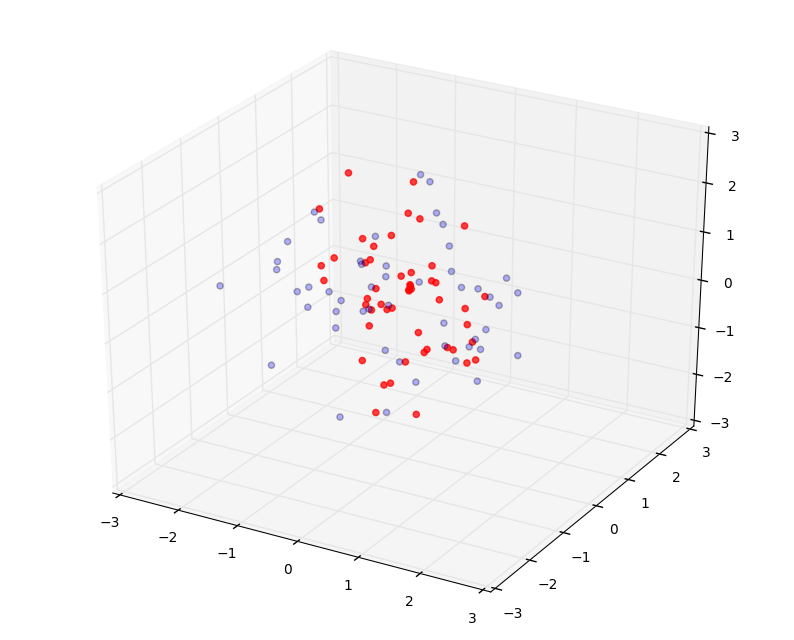

In [12]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
#We will plot only the 50 first values
tv = test_values[:50]
d = d[:50]

test_points = [[v[0] for v in tv],[v[1] for v in tv],[v[2] for v in tv]]
decoded = [[v[0] for v in d], [v[1] for v in d],[v[2] for v in d]]

plt.scatter(test_points[0], test_points[1], zs=test_points[2], alpha=0.3)
plt.scatter(decoded[0],decoded[1], zs=decoded[2] ,alpha=0.75, color ='red')